In [9]:
import pandas as pd
import numpy as np
import dill
from sklearn.metrics import mean_squared_error
from showup.buildmodel.make_model import get_data 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [10]:
with open('showup/website/static/model.pkl', 'rb') as f:
        model = dill.load(f)

In [11]:
X_train, X_test, y_train, y_test = get_data()

/home/cb/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [8]:
mean_squared_error(y_test, model.predict(X_test))

0.36022881813479674

In [6]:
mean_squared_error(y_test, np.ones(len(y_test))*np.mean(y_train))

0.7706411850264582

In [5]:
err = mean_squared_error(y_test, model.predict(X_test))

What does this mean..

In [12]:
len(X_test)

38840

In [12]:
pred = model.predict(X_test)
non_log_actual = np.expm1(y_test)
non_log_pred = np.expm1(pred)

In [13]:
perct_err = (non_log_pred-non_log_actual)/non_log_actual

/home/cb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/cb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [14]:
inf_i = ~np.isfinite(perct_err)

In [16]:
perct_err[np.isnan(perct_err)] = 0

In [17]:
clean_err = perct_err[np.isfinite(perct_err)]

In [30]:
fini_i = np.isfinite(perct_err)

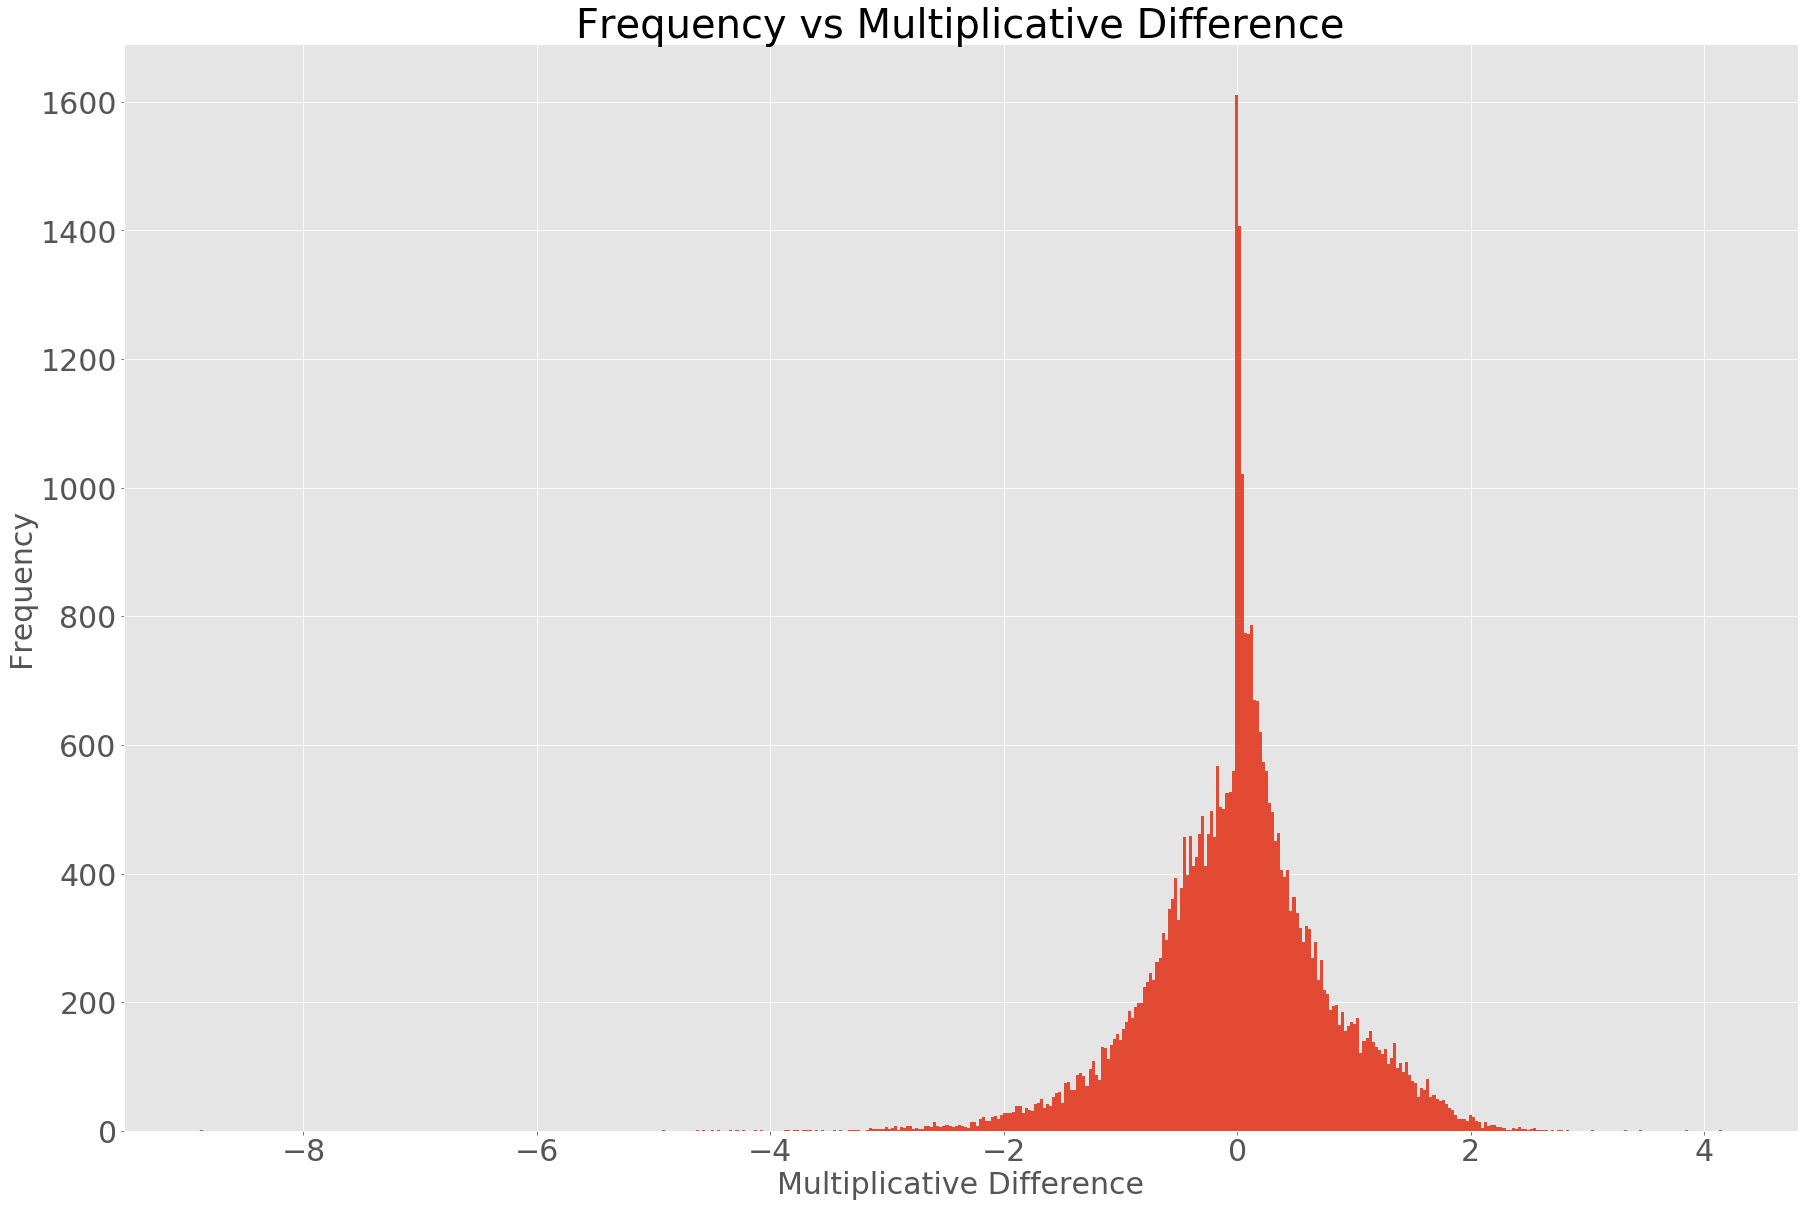

In [41]:
fig, ax = plt.subplots(figsize=(30,20))
ax.hist(np.log1p(clean_err), 500)
ax.set_xlabel('Multiplicative Difference', size=30)
#ax.set_xlim(-1,6)
#ax.set_xscale('log')
ax.set_ylabel('Frequency', size=30)
ax.set_title('Frequency vs Multiplicative Difference', size=40)
#ax.set_xticks(range(-1,6))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30) 
fig.savefig('multdiffvsfrq.jpg')

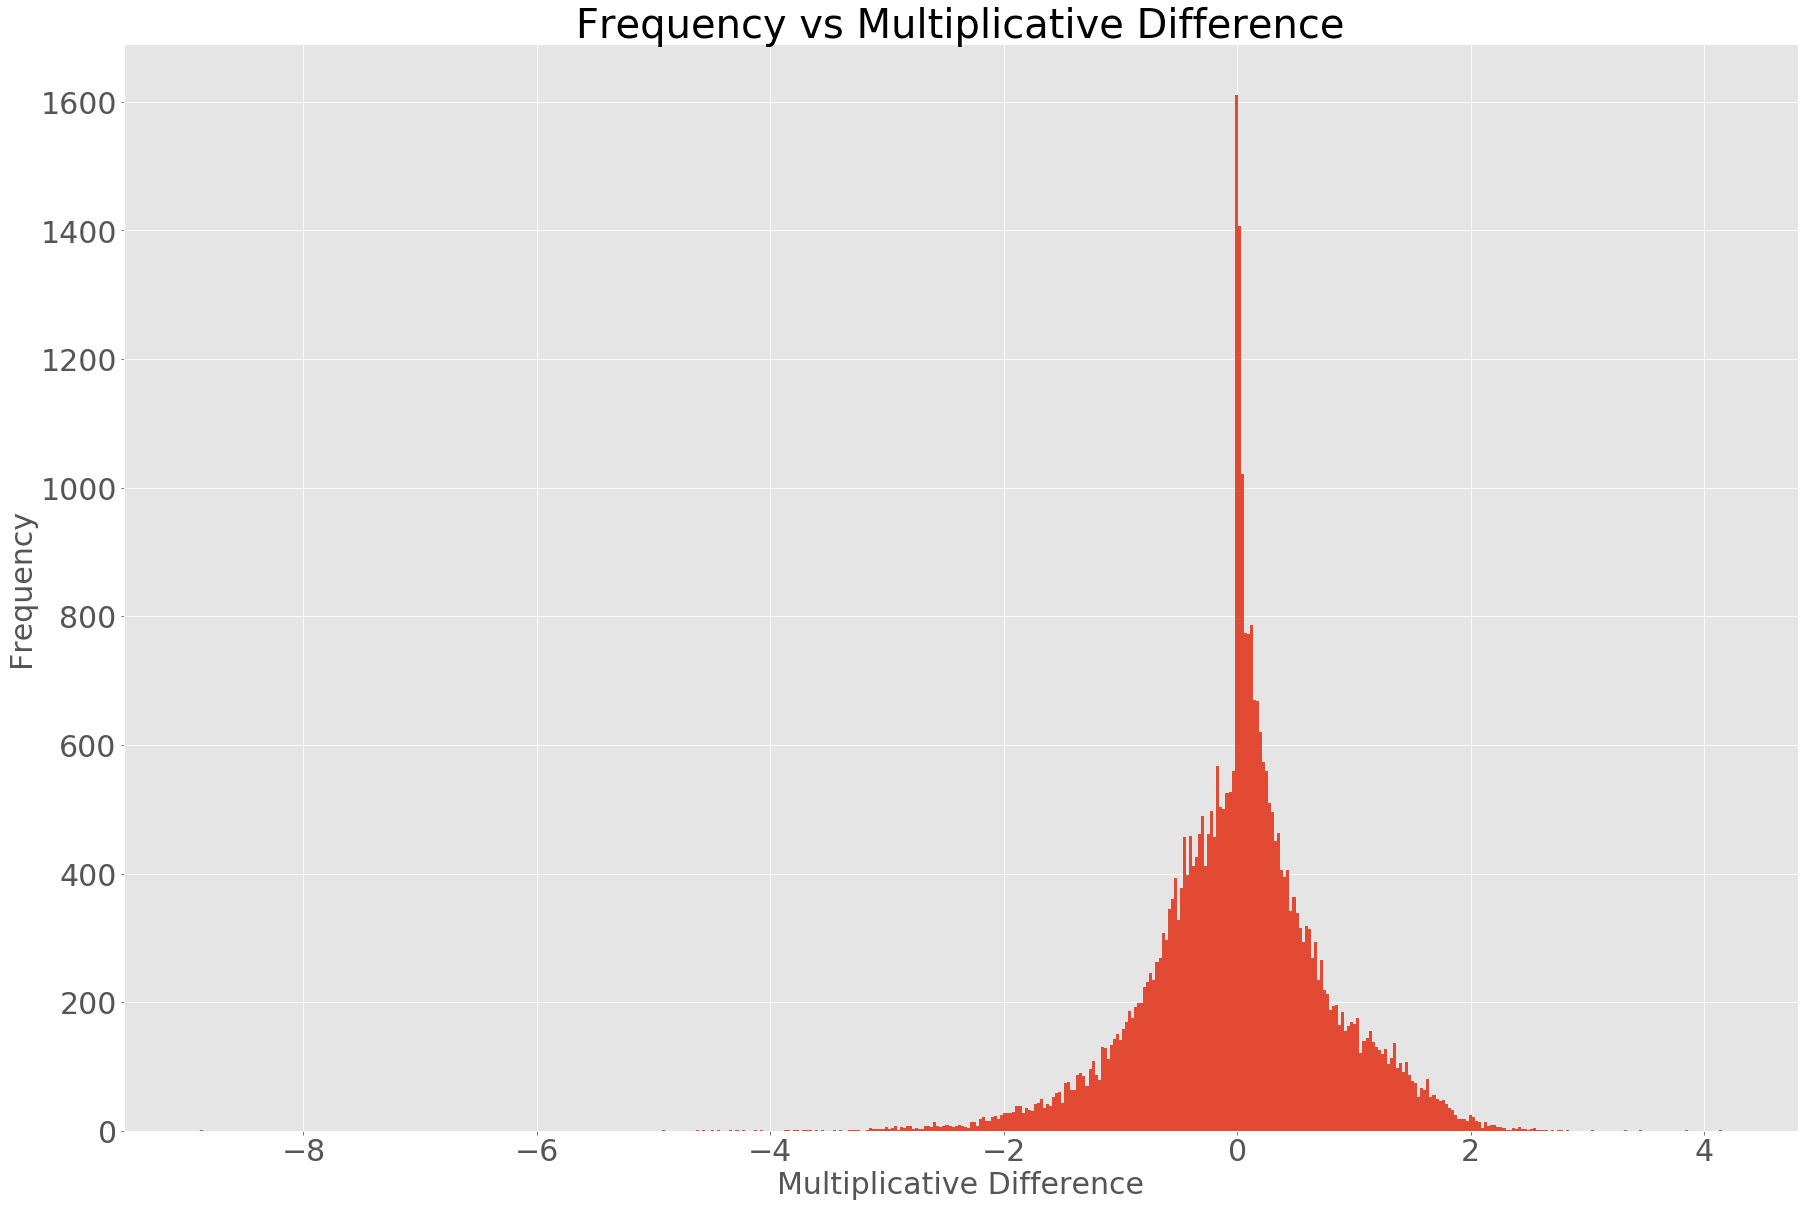

In [41]:
fig, ax = plt.subplots(figsize=(30,20))
ax.hist(np.log1p(clean_err), 500)
ax.set_xlabel('Multiplicative Difference', size=30)
#ax.set_xlim(-1,6)
#ax.set_xscale('log')
ax.set_ylabel('Frequency', size=30)
ax.set_title('Frequency vs Multiplicative Difference', size=40)
#ax.set_xticks(range(-1,6))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30) 
fig.savefig('multdiffvsfrq.jpg')

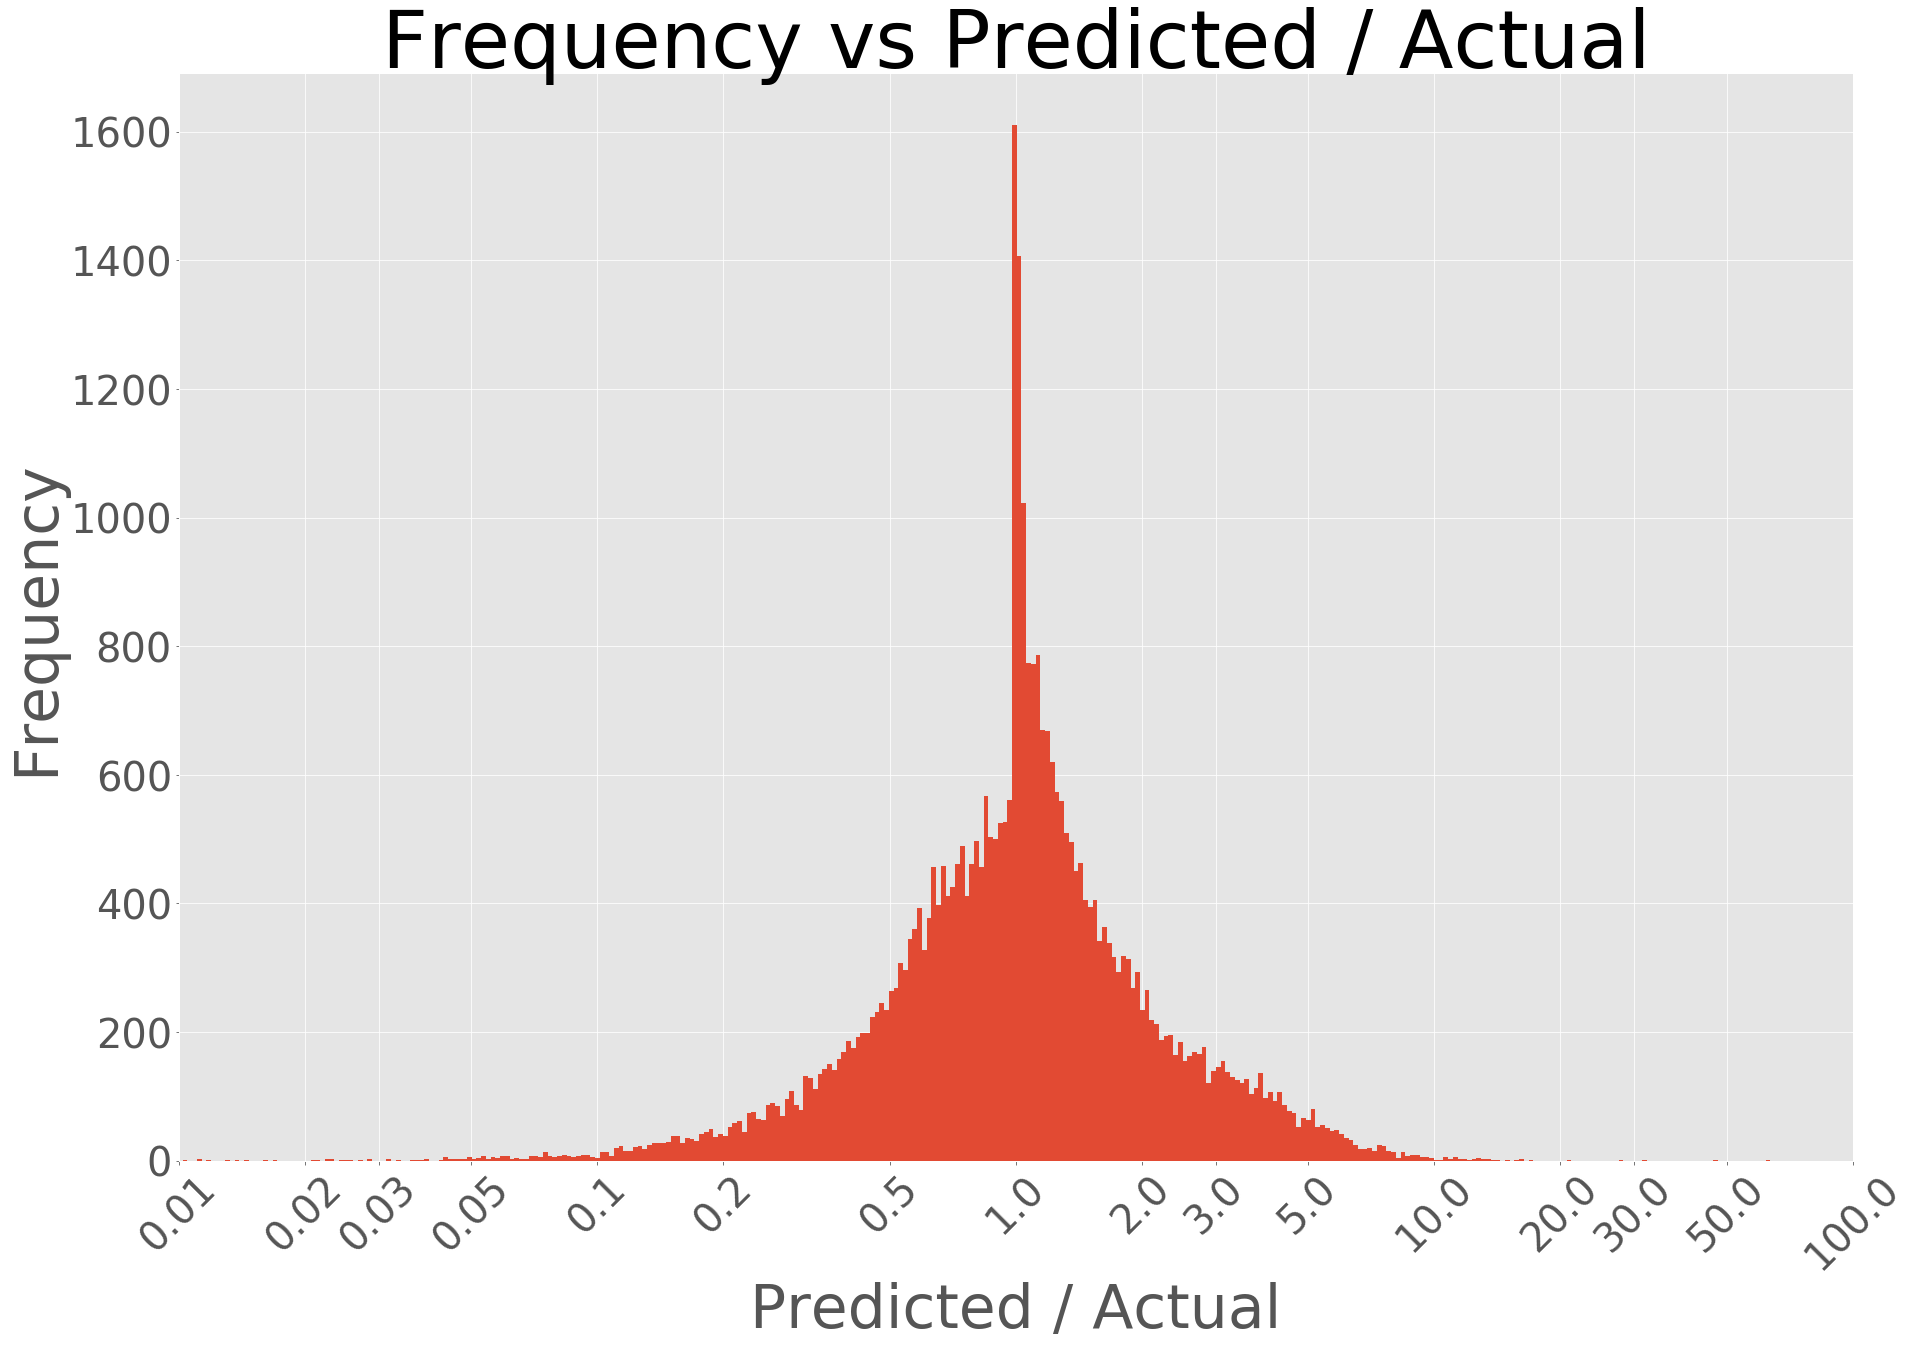

In [76]:
fig, ax = plt.subplots(figsize=(30,20))
ax.hist(np.log10(clean_err + 1), 500)
ax.set_xlabel('Predicted / Actual', size=60)
ax.set_xlim(-2,2)
ticks = np.array([-2,-1,-0.5,0,0.5,1,2])
labels = np.array([0.01,0.02,0.03,0.05, 0.1, .2,.5,1,2,3,5,10,20,30,50,100])
tics = np.log10(labels)
ax.set_ylabel('Frequency', size=60)
ax.set_title('Frequency vs Predicted / Actual', size=80)
ax.set_xticks(tics)
ax.set_xticklabels(labels)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40) 
fig.savefig('multdiffvsfrq.jpg')

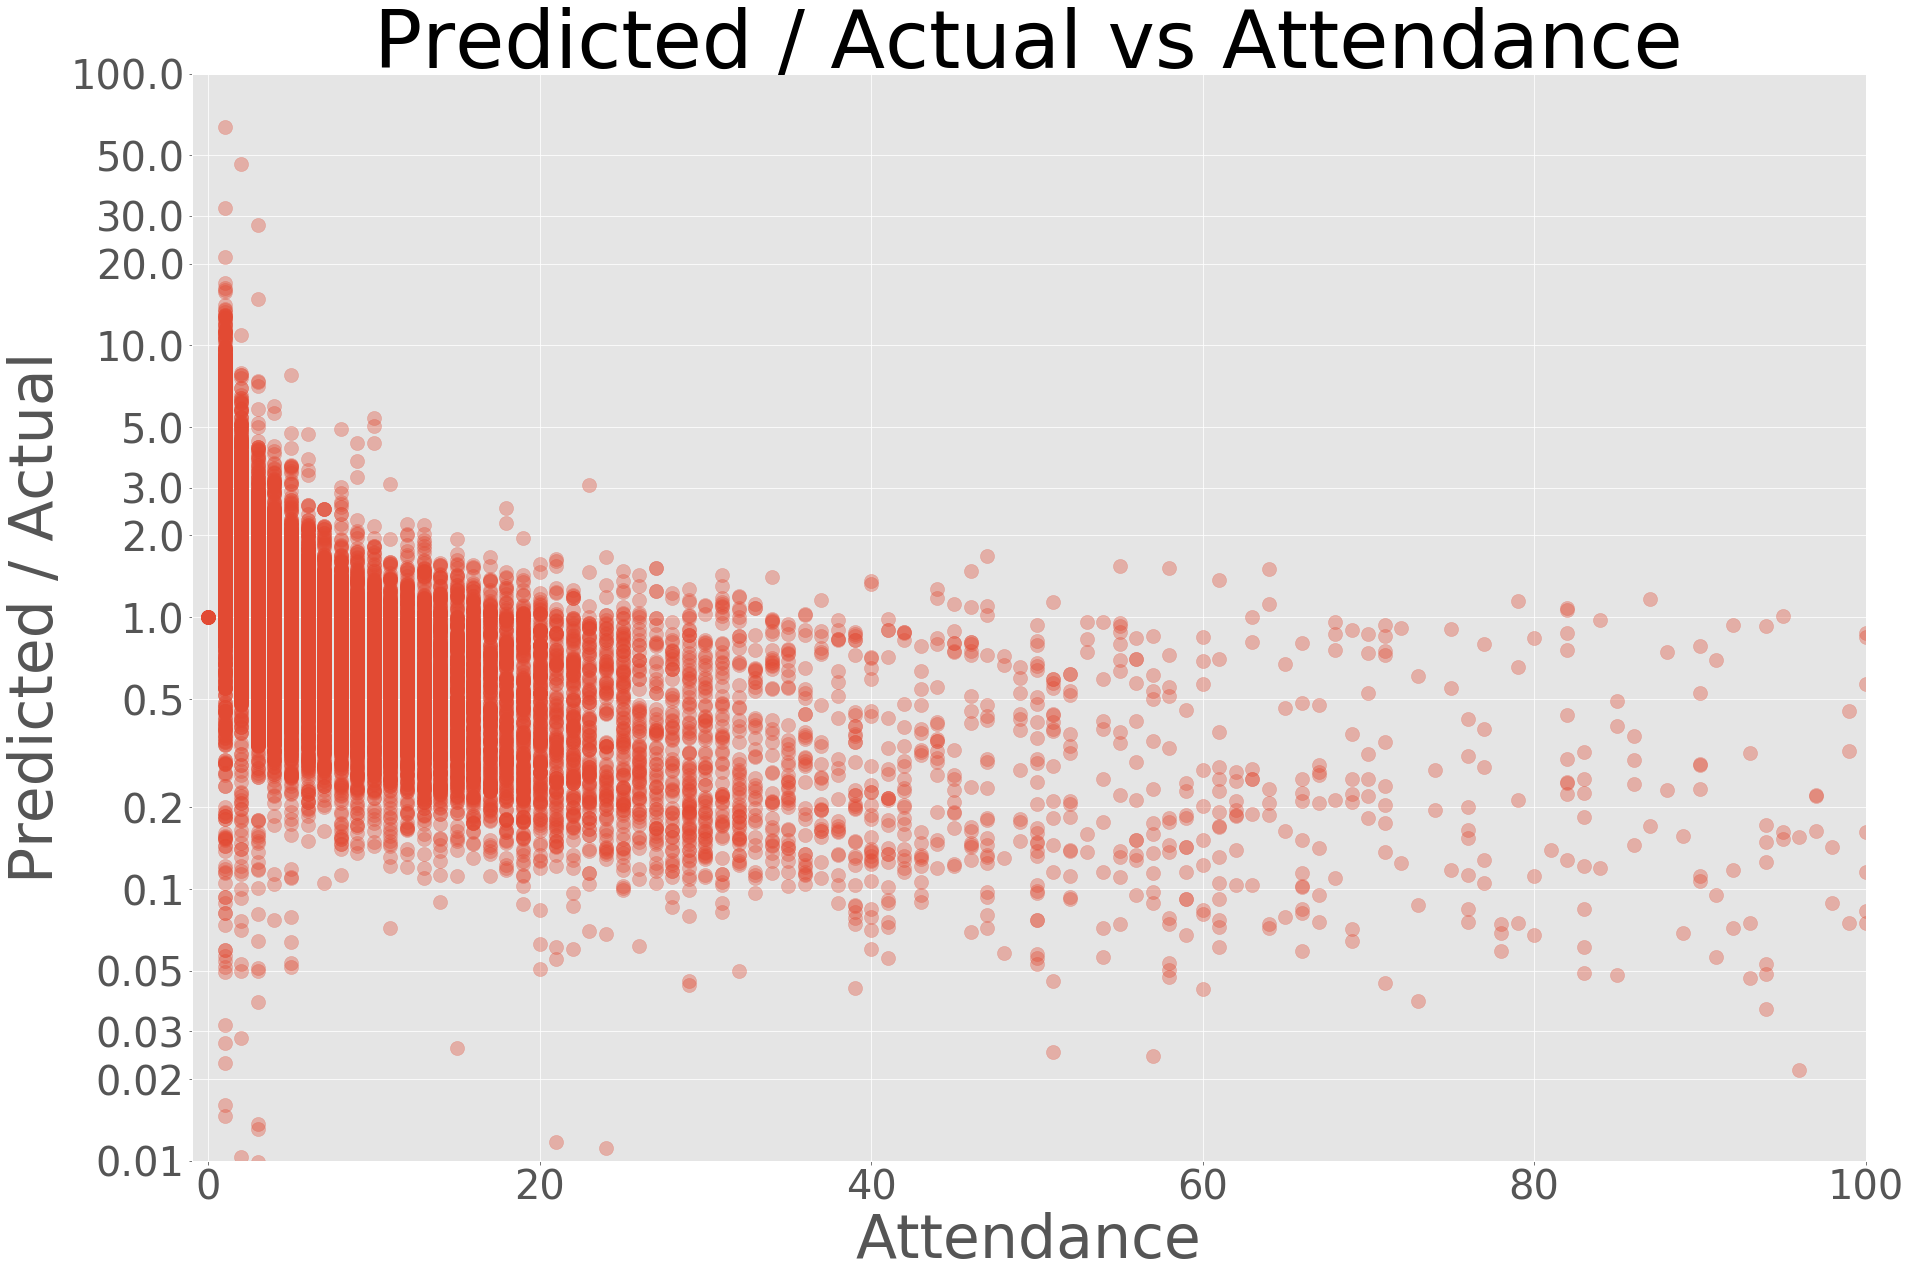

In [73]:
fig, ax = plt.subplots(figsize=(30,20))
ax.scatter(non_log_actual[fini_i], np.log10(clean_err + 1),s=200,alpha=0.35)
ax.set_xlim(-1, 100)
ax.set_ylim(-2, 2)
ax.set_xlabel('Attendance', size=60)
ax.set_ylabel('Predicted / Actual', size=60)
ax.set_title('Predicted / Actual vs Attendance', size=80)
ticks = np.array([-2,-1,-0.5,0,0.5,1,2])
labels = np.array([0.01,0.02,0.03,0.05, 0.1, .2,.5,1,2,3,5,10,20,30,50,100])
tics = np.log10(labels)
ax.set_yticks(tics)
ax.set_yticklabels(labels)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
fig.savefig('PercDiffvsAtten.jpg')

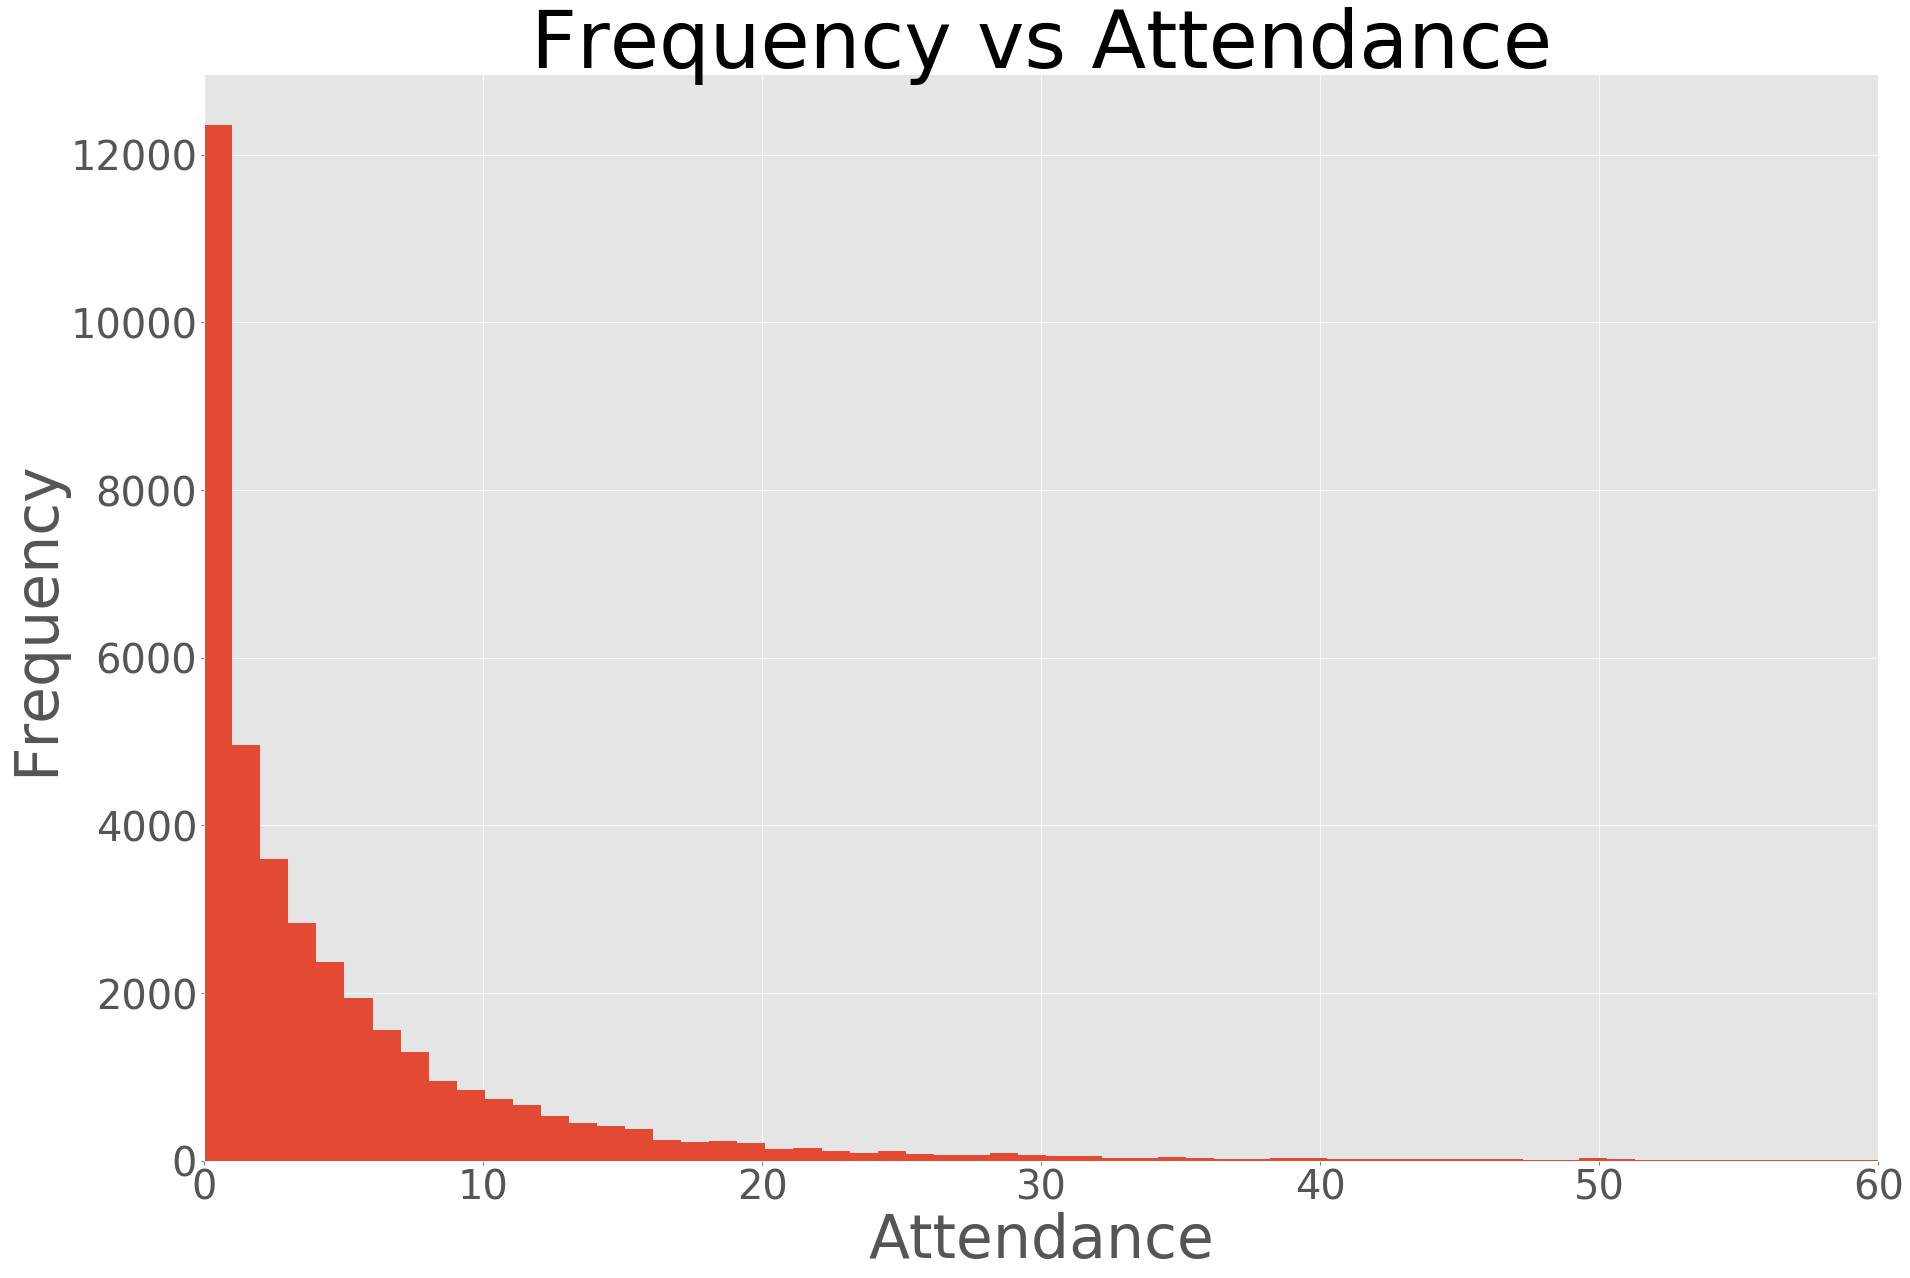

In [92]:
fig, ax = plt.subplots(figsize=(30,20))
ax.hist(non_log_actual, 700)
ax.set_xlim(0, 60)
ax.set_xlabel('Attendance', size=60)
ax.set_ylabel('Frequency', size=60)
ax.set_title('Frequency vs Attendance', size=80)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
fig.savefig('frqvsatten.jpg')

In [17]:
test_df = pd.DataFrame(X_test)
test_df['label'] = y_test
test_df['attendence'] = non_log_actual

In [14]:
pd.set_option('display.max_colwidth', 100)
no_boring = test_df[test_df['label'] > 2]
no_boring.sort_values('label', ascending=False)['link']

132383                   https://www.meetup.com/Seattle-Unreal-Engine-4-Meetup/events/233252433/
27050                                      https://www.meetup.com/here-seattle/events/242345532/
22933                                           https://www.meetup.com/furlife/events/249546818/
22681                                    https://www.meetup.com/NewTechSeattle/events/243684369/
20866                              https://www.meetup.com/Seattle-Spark-Meetup/events/229483070/
17119                                         https://www.meetup.com/PSPPython/events/241981612/
44475               https://www.meetup.com/NET-Developers-Association-Eastside/events/237706461/
17049                                         https://www.meetup.com/PSPPython/events/232708762/
16164                                     https://www.meetup.com/LearnUXDesign/events/246783247/
22901                                           https://www.meetup.com/furlife/events/235815766/
24423                         

In [60]:
len(test_df)

38840

(array([1.2670e+03, 1.6040e+04, 1.0755e+04, 6.0590e+03, 3.3100e+03,
        9.2600e+02, 3.0800e+02, 1.6300e+02, 1.1000e+01, 1.0000e+00]),
 array([0.        , 0.65581978, 1.31163956, 1.96745934, 2.62327912,
        3.2790989 , 3.93491868, 4.59073846, 5.24655824, 5.90237802,
        6.5581978 ]),
 <a list of 10 Patch objects>)

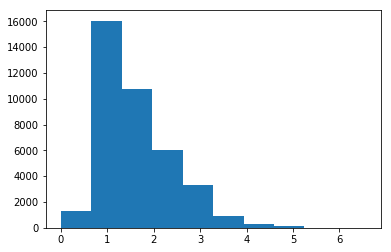

In [62]:
plt.hist(X_test['label'])

,Unnamed: 0,_id,created,description,description_images,duration,event_hosts,featured,featured_photo,fee,...,status,time,updated,utc_offset,venue,visibility,waitlist_count,why,yes_rsvp_count,label
22333,22333,5b7b500d934f0d0d18f566a1,1.506791e+12,"<p>This is an eastside tours evening ride. Please see o<a href=""https://www.cascade.org/node/253...",[],10800000.0,"[{'id': 131510642, 'name': 'Eric Gunnerson', 'intro': 'I am the ride leader for the long-running...",False,NaN,NaN,...,past,1.516934e+12,1.516951e+12,-28800000.0,"{'id': 25523161, 'name': 'Performance Bicycle', 'lat': 47.63203811645508, 'lon': -122.1369094848...",public,0.0,NaN,2.0,1.098612
32059,32059,5b7b5017934f0d0d18f5c70a,NaN,NaN,NaN,10800000.0,NaN,NaN,NaN,NaN,...,NaN,1.481301e+12,NaN,-28800000.0,NaN,public_limited,0.0,NaN,37.0,3.637586
98423,98423,5b7b5058934f0d0d18f85964,1.488407e+12,"<p>Hello Everyone,</p> <p>Let's get together for brunch at Haiku! It is a beautiful ""All You Ca...",[],7200000.0,"[{'id': 2650816, 'name': 'Amiga Debbie', 'intro': 'Looking forward to meet you all.', 'photo': {...",False,NaN,NaN,...,past,1.489955e+12,1.489965e+12,-25200000.0,"{'id': 25082057, 'name': 'Haiku Sushi & Seafood Buffet', 'lat': 0.0, 'lon': 0.0, 'repinned': Fal...",public,0.0,NaN,16.0,2.833213
23998,23998,5b7b500f934f0d0d18f5772a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.442628e+12,NaN,-25200000.0,NaN,public_limited,0.0,NaN,32.0,3.496508
50408,50408,5b7b5029934f0d0d18f67d4c,1.428291e+12,"<p><img src=""http://photos4.meetupstatic.com/photos/event/7/5/8/5/600_436050085.jpeg"" /></p> <p>...",[],14400000.0,"[{'id': 152360632, 'name': 'Elliot Whiting', 'intro': 'Games = awesome', 'photo': {'id': 2631579...",False,NaN,NaN,...,past,1.441760e+12,1.441777e+12,-25200000.0,"{'id': 18143562, 'name': 'DELRIDGE Uptown Espresso and Gameporium', 'lat': 47.569427490234375, '...",public,0.0,NaN,1.0,0.693147
15761,15761,5b7b5007934f0d0d18f5252c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.443321e+12,NaN,-25200000.0,NaN,public_limited,0.0,NaN,15.0,2.772589
82628,82628,5b7b5049934f0d0d18f7be05,1.454285e+12,"<p>Our <b>All Geeks, All Games</b> events are growing in popularity!</p> <p>Join <a href=""http:/...",[],14400000.0,"[{'id': 135202272, 'name': 'Andy Munich', 'intro': ""I'm Andy. I'm the 8 Hour Gamer (on Tumblr) a...",False,NaN,NaN,...,past,1.458090e+12,1.458106e+12,-25200000.0,NaN,public,0.0,NaN,15.0,2.772589
114322,114322,5b7b5067934f0d0d18f8f674,1.483332e+12,<p>Our <i>outdoor</i> GRS ride from the store will be taking a cold weather break till Spring an...,[],NaN,"[{'id': 133224752, 'name': 'Chris London', 'intro': '-', 'photo': {'id': 177569332, 'highres_lin...",False,NaN,NaN,...,past,1.496273e+12,1.496287e+12,-25200000.0,NaN,public,0.0,NaN,2.0,1.098612
7919,7919,5b7b4ffe934f0d0d18f4d73c,1.404660e+12,"<p>We play through rain, shine, or killer bees. Casual game, all skill levels welcome. </p> <p>...",[],95400000.0,"[{'id': 109840732, 'name': 'Ryan', 'intro': ""I'm a computer engineer who loves to play games and...",False,NaN,NaN,...,past,1.457204e+12,1.457301e+12,-28800000.0,"{'id': 366803, 'name': 'Cal Anderson Park', 'lat': 47.615692138671875, 'lon': -122.3181762695312...",public,0.0,NaN,3.0,1.386294
99819,99819,5b7b505a934f0d0d18f8678c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.473473e+12,NaN,-25200000.0,NaN,public_limited,0.0,NaN,2.0,1.098612


In [18]:
len(test_df[test_df['attendence'] <= 10])/len(test_df)

0.820442842430484